In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [181]:
BASE_DIR = r'./'
data_file_name = 'graph_plot_data.csv'

SEED = 1

In [182]:
# graph heat map styles
heat_map_style_dict = {}
heat_map_style_dict[0] = {
    'edge_color': 'b',
    'style': 'solid',
    'alpha': 0.75,
    'width': 2
}
heat_map_style_dict[1] = {
    'edge_color': 'g',
    'style': 'solid',
    'alpha': 0.5,
    'width': 4
}
heat_map_style_dict[2] = {
    'edge_color': 'y',
    'style': 'solid',
    'alpha': 0.25,
    'width': 6
}
heat_map_style_dict[3] = {
    'edge_color': 'r',
    'style': 'solid',
    'alpha': 1,
    'width': 8
}

In [183]:
# val: 0 исключаем предпроверкой
def which_quartile(val, qu_list):
    for i, qu_val in enumerate(qu_list):
        if val <= qu_val:
            # i-1 for convinient usage
            return i-1

def plot_graph(df_graph_data, graph_style_dict, seed=SEED):
    G = nx.Graph()

    [G.add_edge(u, v, weight=round(x1,4)) for u, v, x1 in zip(df_graph_data['u'],
                                    df_graph_data['v'], df_graph_data['x1']) if x1>0]

    # extra 0 to simplify which_quartile function
    qu_list = list(df_graph_data.x1.quantile(q=[0, .25, .5, .75, 1]))
    
    e = []
    for _ in range(4):
        e.append([(u, v) for (u, v, d) in G.edges(data=True) if which_quartile(d["weight"], qu_list)==_])
    
    # prod output on kaggle (needs more dependencies on local windows)
    #pos = nx.nx_pydot.graphviz_layout(G, prog="neato", root=0)
    
    # fallback replacement for working solution
    pos = nx.circular_layout(G)

    # nodes
    nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)

    # edges
    [nx.draw_networkx_edges(G, pos, edgelist=e_qu_list, **graph_style_dict[i])
     for i, e_qu_list in enumerate(e)]

    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): '>0' 
                                                      if round(d["weight"], 2)==0
                                                      else round(d["weight"], 2)
                                                      for u, v, d in G.edges(data=True)}
                                )

    fig = plt.figure(1, figsize=(100, 500), dpi=60)
    plt.axis("off")
    plt.title('Типовой граф для конкретного ego_id', fontweight='bold')
    plt.legend(['вершина\nграфа', r'$0<{x_1}{\leq}Q_{1}$', r'$Q_{1}<x_1{\leq}Q_{2}$',
                r'$Q_{2}<x_1{\leq}Q_{3}$', r'$Q_{3}<x_1$'], loc='lower left')
    plt.show()

In [184]:
# load data
df_graph = pd.read_csv(f'{BASE_DIR}{data_file_name}')
df_graph.head()

,u,v,x1
0,0,1,1.304720
1,0,4,0.420411
2,0,5,0.355491
3,0,10,0.000000
4,0,12,0.000494


In [185]:
# preprocess data
df_graph=df_graph[df_graph.x1!=0]
df_graph.head()

,u,v,x1
0,0,1,1.304720
1,0,4,0.420411
2,0,5,0.355491
4,0,12,0.000494
6,0,14,0.000066


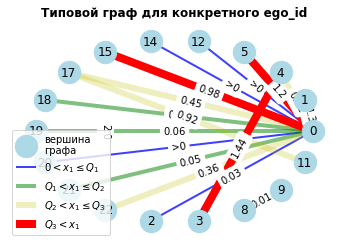

In [186]:
plot_graph(df_graph, heat_map_style_dict)